 # Principle Component Analysis

Implementing PCA on a 2-D Dataset:
    
<h5>Step 1: Normalize the data</h5>

First step is to normalize the data that we have so that PCA works properly. This is done by subtracting the respective means from the numbers in the respective column. So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.
<h5>Step 2: Calculate the covariance matrix</h5>

Since the dataset we took is 2-dimensional, this will result in a 2x2 Covariance matrix.

Please note that Var[X1] = Cov[X1,X1] and Var[X2] = Cov[X2,X2].
<h5>Step 3: Calculate the eigenvalues and eigenvectors</h5>

Next step is to calculate the eigenvalues and eigenvectors for the covariance matrix. The same is possible because it is a square matrix. ƛ is an eigenvalue for a matrix A if it is a solution of the characteristic equation:

det( ƛI - A ) = 0

Where, I is the identity matrix of the same dimension as A which is a required condition for the matrix subtraction as well in this case and ‘det’ is the determinant of the matrix. For each eigenvalue ƛ, a corresponding eigen-vector v, can be found by solving:

( ƛI - A )v = 0
<h5>Step 4: Choosing components and forming a feature vector:</h5>

We order the eigenvalues from largest to smallest so that it gives us the components in order or significance. Here comes the dimensionality reduction part. If we have a dataset with n variables, then we have the corresponding n eigenvalues and eigenvectors. It turns out that the eigenvector corresponding to the highest eigenvalue is the principal component of the dataset and it is our call as to how many eigenvalues we choose to proceed our analysis with. To reduce the dimensions, we choose the first p eigenvalues and ignore the rest. We do lose out some information in the process, but if the eigenvalues are small, we do not lose much.

Many thanks to :

https://www.kaggle.com/shrutimechlearn/step-by-step-pca-with-iris-dataset

https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
import pandas as pd

dataset=load_iris()
iris_data=pd.DataFrame(dataset['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
iris_data['Species']=dataset['target']
iris_data['Species']=iris_data['Species'].apply(lambda x: dataset['target_names'][x])

/home/sanjukta/anaconda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris_data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


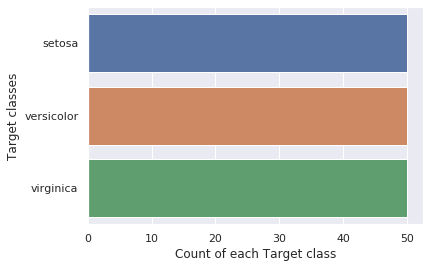

In [5]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()


<h5>Early Insights :</h5>

    There are total 150 rows
    4 Independent variables to act as factors
    All have same units of measurement (cm)
    No missing data
    Three unique target classes namely : 'setosa', 'versicolor' and 'virginica'
    It is a balanced data set, all target classes have equal number of rows (50 each).



<h2>Bivariate Analysis

<h5> Box plot

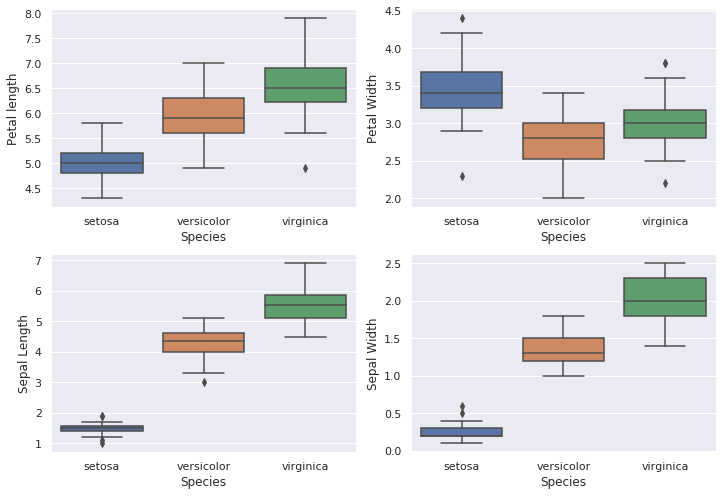

In [6]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(10,7))
row = 0
col = 0
for i in range(len(iris_data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_data['Species'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

<h5> Pair Plot

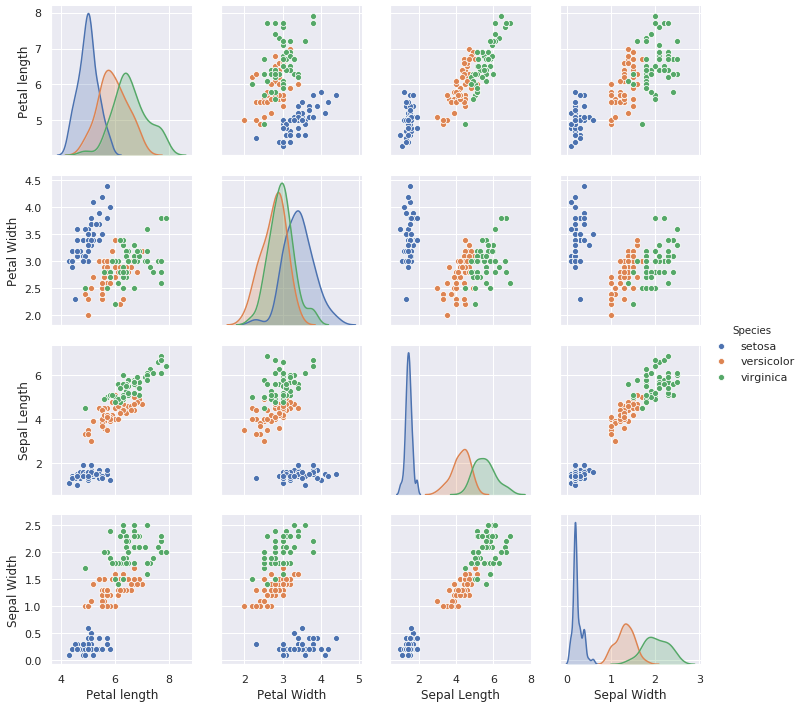

In [7]:
sns.pairplot(iris_data, hue = 'Species')

<h5> Heat Map

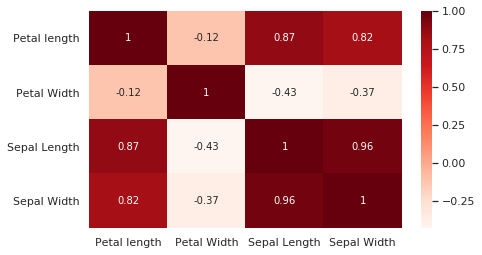

In [8]:
plt.figure(figsize=(7,4))
sns.heatmap(iris_data.corr(),annot=True,cmap='Reds')

<h5>Conclusion:</h5>

One of the biggest aims of these sort of plots and EDAs are to identify features that are not much helpful in explaining the target outcome. The Petal Width feature seems to be less relevant in explaining the target class as compared to the other features

If we consider Sepal Length Feature, it will easily seperate all 3 classes.

<h1>Modelling

<h3>1. Without PCA

<h5>Standardize the Data</h5>
    
    PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [9]:
from sklearn.preprocessing import StandardScaler

features = ["Petal length","Petal Width","Sepal Length","Sepal Width"]# Separating out the features
x = iris_data.loc[:, features].values# Separating out the target
print("Before Standardizing ", x)

y = iris_data.loc[:,['Species']].values# Standardizing the features
x_std = StandardScaler().fit_transform(x)

print("After Standardizing ",x_std)

Before Standardizing  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2

<h2>PCA Projection to 2D

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

In [26]:
finalDf = pd.concat([principalDf, iris_data[['Species']]], axis = 1)

finalDf.head()

,principal component 1,principal component 2,Species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


<h2>Visualize 2D Projection

This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

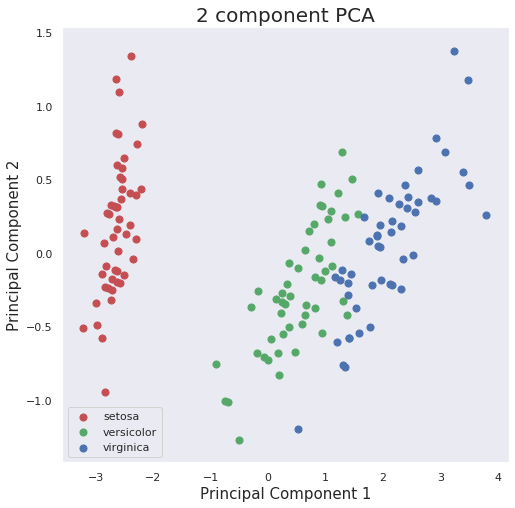

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<h2>Explained Variance

<h5>Covariance Matrix</h5>

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a d×d

matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:
σjk=1n−1∑i=1n(xij−x¯j)(xik−x¯k).

We can summarize the calculation of the covariance matrix via the following matrix equation:
Σ=1n−1((X−x¯)T(X−x¯))

where x¯ is the mean vector x¯=1n∑i=1nxi.
The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [13]:
# simply used for demonstration purposes, equivalently, we could have used the numpy cov function:

print('NumPy covariance matrix: \n%s' %np.cov(x_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [14]:
# Next, we perform an eigendecomposition on the covariance matrix:

cov_mat = np.cov(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


# Correlation Matrix
#### Eigendecomposition of the standardized data based on the correlation matrix:

In [15]:
cor_mat1 = np.corrcoef(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.91849782 0.91403047 0.14675688 0.02071484]


#### Eigendecomposition of the raw data based on the correlation matrix:

In [16]:
cor_mat2 = np.corrcoef(x.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.91849782 0.91403047 0.14675688 0.02071484]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

    Eigendecomposition of the covariance matrix after standardizing the data.
    Eigendecomposition of the correlation matrix.
    Eigendecomposition of the correlation matrix after standardizing the data.


# Singular Value Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Value Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [17]:
u,s,v = np.linalg.svd(x_std.T)
u


array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

# Selecting Principal Components

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
2.918497816531998
0.9140304714680696
0.1467568755713156
0.02071483642861873


# Explained Variance

After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [19]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

cum_var_exp


array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

<h5>Observation :</h5>

you can see that the first principal component contains 72.77% of the variance and together, the two components contain 95.80% of the information and so on.

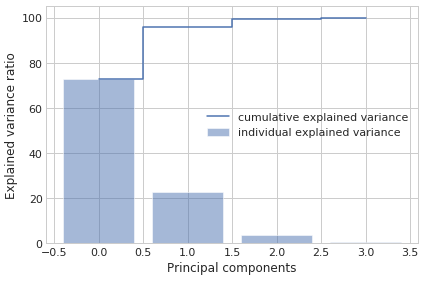

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.




# Projection Matrix

The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k
-dimensional eigenvector matrix <h9>W</h9>.

In [21]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)


Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


# Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [22]:
Y = x_std.dot(matrix_w)

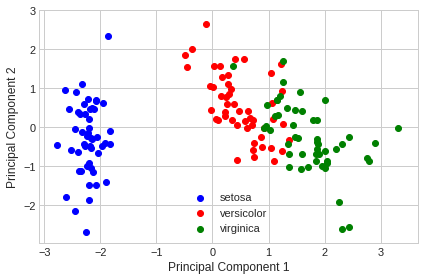

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[iris_data['Species']==lab, 0],
                    Y[iris_data['Species']==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


# Conclusion: 

<h5> In the Explained Variance section we come to a conclusion that the first principal component contains 72.96% of the variance and the second principal component contains 22.85% of the variance. Together, the two components contain 95.81% of the information.